This is meant to serve as a well documented analysis workflow for solving some outstanding questions we have about the dataset.

Sample guide:
985 - Empty
986 - H2B WT-flag
987 - H2B E76K-flag
988 - H2B E76R-flag
989 - H2B G53D-flag
990 - H2B G53E-flag
991 - H2B G53K-flag
992 - H2B G53R-flag

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load in data from each sample, that has been fully normalized

#loading write files 
adata1 = sc.read_h5ad('write/Hir_985.h5ad')
adata2 = sc.read_h5ad('write/Hir_986.h5ad')
adata3 = sc.read_h5ad('write/Hir_987.h5ad')
adata4 = sc.read_h5ad('write/Hir_988.h5ad')
adata5 = sc.read_h5ad('write/Hir_989.h5ad')
adata6 = sc.read_h5ad('write/Hir_990.h5ad')
adata7 = sc.read_h5ad('write/Hir_991.h5ad')
adata8 = sc.read_h5ad('write/Hir_992.h5ad')

In [3]:
#makes a new obs var called 'sample_id'
adata1.obs['sample_id'] = "EMP"
adata2.obs['sample_id'] = "H2B WT"
adata3.obs['sample_id'] = "H2B E76K"
adata4.obs['sample_id'] = "H2B E76R"
adata5.obs['sample_id'] = "H2B G53D"
adata6.obs['sample_id'] = "H2B G53E"
adata7.obs['sample_id'] = "H2B G53K"
adata8.obs['sample_id'] = "H2B G53R"

In [43]:
adata1

AnnData object with n_obs × n_vars = 13771 × 1994
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample_id'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [27]:
#load in previously annotated merged file of all 8 samples etc

merged = sc.read_h5ad('write/merge_8samples.h5ad')
data5 = sc.read_h5ad('write/g53dvwt.h5ad')

C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
merged.obs.sample_id

AAACCCAAGCGCCATC-1         EMP
AAACCCAAGTATAGAC-1         EMP
AAACCCAGTAGGCTCC-1         EMP
AAACCCAGTCGAATTC-1         EMP
AAACCCAGTCGCAACC-1         EMP
                        ...   
TTTGTTGTCAGAACCT-1    H2B G53R
TTTGTTGTCCACGTCT-1    H2B G53R
TTTGTTGTCCTGGCTT-1    H2B G53R
TTTGTTGTCGACCATA-1    H2B G53R
TTTGTTGTCTGGAGAG-1    H2B G53R
Name: sample_id, Length: 164815, dtype: category
Categories (8, object): ['EMP', 'H2B E76K', 'H2B E76R', 'H2B G53D', 'H2B G53E', 'H2B G53K', 'H2B G53R', 'H2B WT']

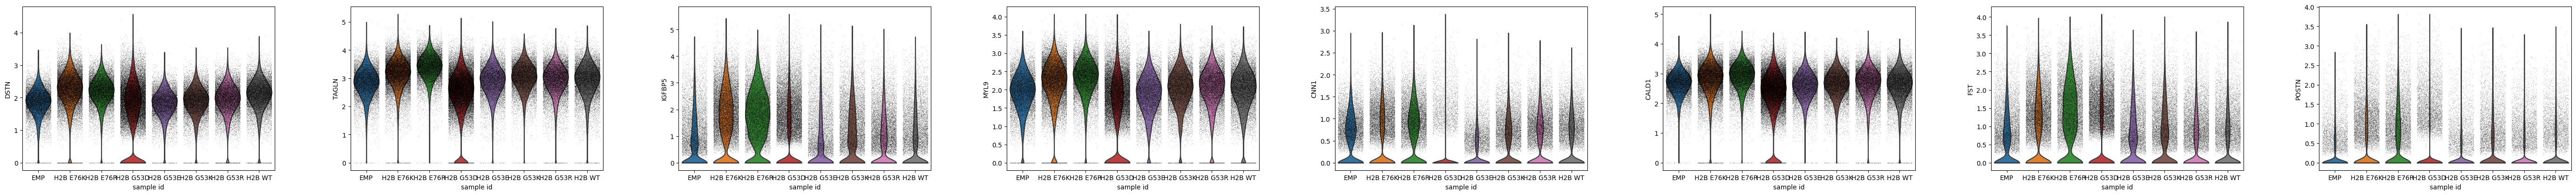

In [20]:
#identify genes of interest
marker_genes = ['DSTN', 'TAGLN', 'IGFBP5', 'MYL9', 'CNN1', 'CALD1', 'FST', 'POSTN']

#plot genes of interest
sc.pl.violin(merged, marker_genes, groupby='sample_id', jitter=0.4, size=0.3)

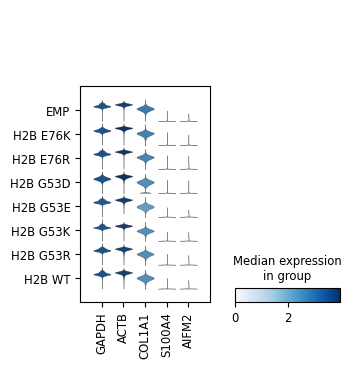

In [28]:
#identify genes of interest
marker_genes = ['GAPDH', 'ACTB', 'COL1A1', 'S100A4', 'AIFM2']
#FSP1 not found - could either be S100A4 or AIFM2

#plot genes of interest
sc.pl.violin(merged, marker_genes, groupby='sample_id', jitter=0.4, size=0.3)

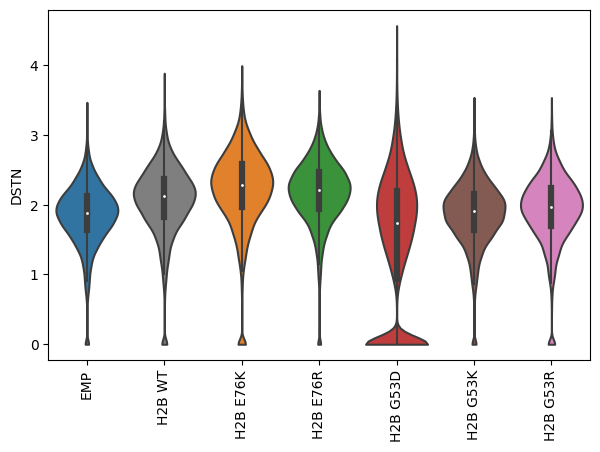

In [30]:
#attempt to plot individual genes with a given order of samples 

sc.pl.violin(merged, 'DSTN', groupby='sample_id', order = ['EMP', 'H2B WT', 'H2B E76K', 'H2B E76R', 'H2B G53D', 'H2B G53K', 'H2B G53R'], jitter=0.4, size=0.35, rotation = 90, stripplot=False, inner='box')

#this does not work properly as the dots do not appear

In [25]:
#making pairwise DEG comparisons
#this is done by combining specific datasets and comparing them that way

#G53D vs. WT
import time
data5 = adata2
for i in range(5,6):
    t1 = time.perf_counter()
    data5 = data5.concatenate(eval('adata'+str(i)), index_unique=None)
    t2 = time.perf_counter()
    print('Appended adata'+str(i)+' in '+str(round(t2-t1,3))+' seconds')

Appended adata5 in 18.027 seconds


C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [21]:
#merging 
#E76R vs. EMP and WT

import time
data6 = adata1
for i in [2, 4]:
    print ('joining', 'adata'+str(i))
    t1 = time.perf_counter()
    data6 = data6.concatenate(eval('adata'+str(i)), index_unique=None)
    t2 = time.perf_counter()
    print('Appended adata'+str(i)+' in '+str(round(t2-t1,3))+' seconds')

joining adata2


C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Appended adata2 in 5.643 seconds
joining adata4


C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Appended adata4 in 9.004 seconds


C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
#merging 
#E76K vs. EMP

import time
data6 = adata1
for i in [3]:
    print ('joining', 'adata'+str(i))
    t1 = time.perf_counter()
    data6 = data6.concatenate(eval('adata'+str(i)), index_unique=None)
    t2 = time.perf_counter()
    print('Appended adata'+str(i)+' in '+str(round(t2-t1,3))+' seconds')

joining adata3
Appended adata3 in 2.877 seconds


C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
#merging 
#E76R vs. EMP

import time
data6 = adata1
for i in [4]:
    print ('joining', 'adata'+str(i))
    t1 = time.perf_counter()
    data6 = data6.concatenate(eval('adata'+str(i)), index_unique=None)
    t2 = time.perf_counter()
    print('Appended adata'+str(i)+' in '+str(round(t2-t1,3))+' seconds')

joining adata4
Appended adata4 in 5.672 seconds


C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


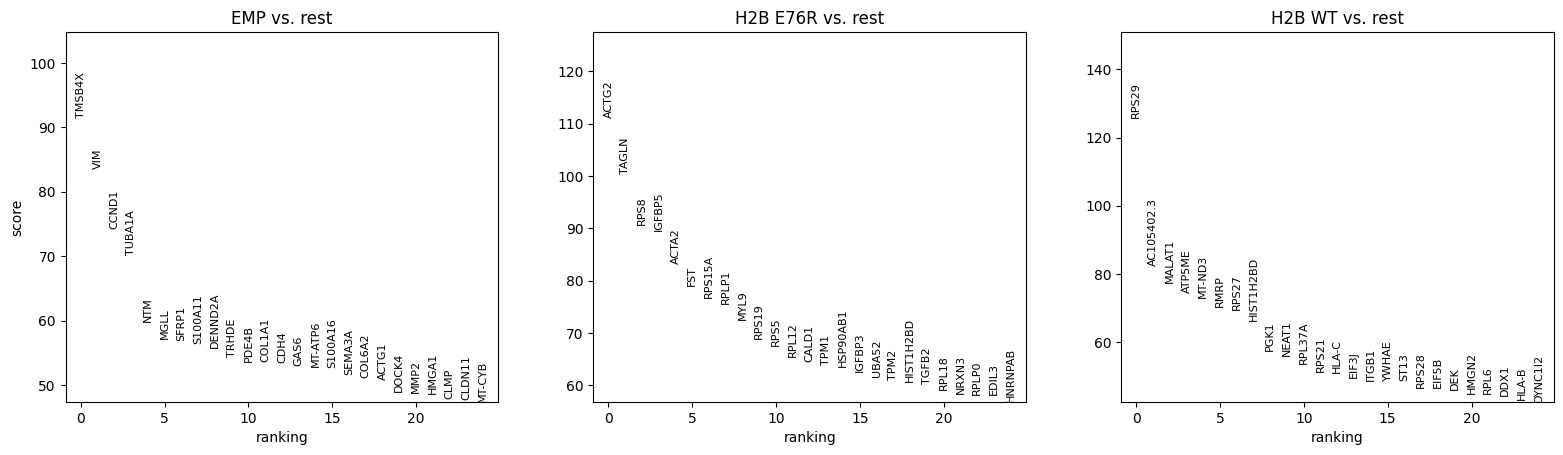

In [22]:
sc.tl.rank_genes_groups(data6, 'sample_id', method='wilcoxon')
sc.pl.rank_genes_groups(data6, n_genes=25, sharey=False)

In [17]:
data6

AnnData object with n_obs × n_vars = 55629 × 1017
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample_id', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'highly_variable', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'means-0-0', 'dispersions-0-0', 'dispersions_norm-0-0', 'mean-0-0', 'std-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'means-1-0', 'dispersions-1-0', 'dispersions_norm-1-0', 'mean-1-0', 'std-1-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean-1', 'std-1'
    uns: 'rank_genes_groups'
    obsm: 'X_pca'

In [23]:
#data5.write('write/g53dvwt.h5ad')
data6.write('write/e76rvemp_wt.h5ad')

In [25]:
#saves to csv file the name and scores for ranked genes from relevant comparisons

#df = pd.DataFrame(data6.uns['rank_genes_groups']['scores'])
df = pd.DataFrame(data6.uns['rank_genes_groups']['names'])
df.to_csv('tempout.csv')

In [54]:
sc.tl.rank_genes_groups(merged, 'sample_id', method='wilcoxon')
sc.pl.rank_genes_groups(merged, n_genes=25, sharey=False)

KeyboardInterrupt: 

In [17]:
data5.uns['rank_genes_groups']['names'][[2]]#['scores']
#pd.DataFrame(data5.uns['rank_genes_groups']['scores'], data5.uns['rank_genes_groups']['names']).head(30)

array([('TMSB10', 'MT-CO1')], dtype=[('H2B G53D', 'O'), ('H2B WT', 'O')])

In [76]:
#saves to csv file the name and scores for ranked genes from relevant comparisons

#df = pd.DataFrame(data5.uns['rank_genes_groups']['names'])
df = pd.DataFrame(data5.uns['rank_genes_groups']['scores'])
df.to_csv('tempout.csv')